In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import seaborn as sns 
import pickle


In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
pf =ProfileReport(df)

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
for j in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    df[j] = df[j].replace(0, df[j].mean())



In [80]:
pf =ProfileReport(df)
# pf

<AxesSubplot:>

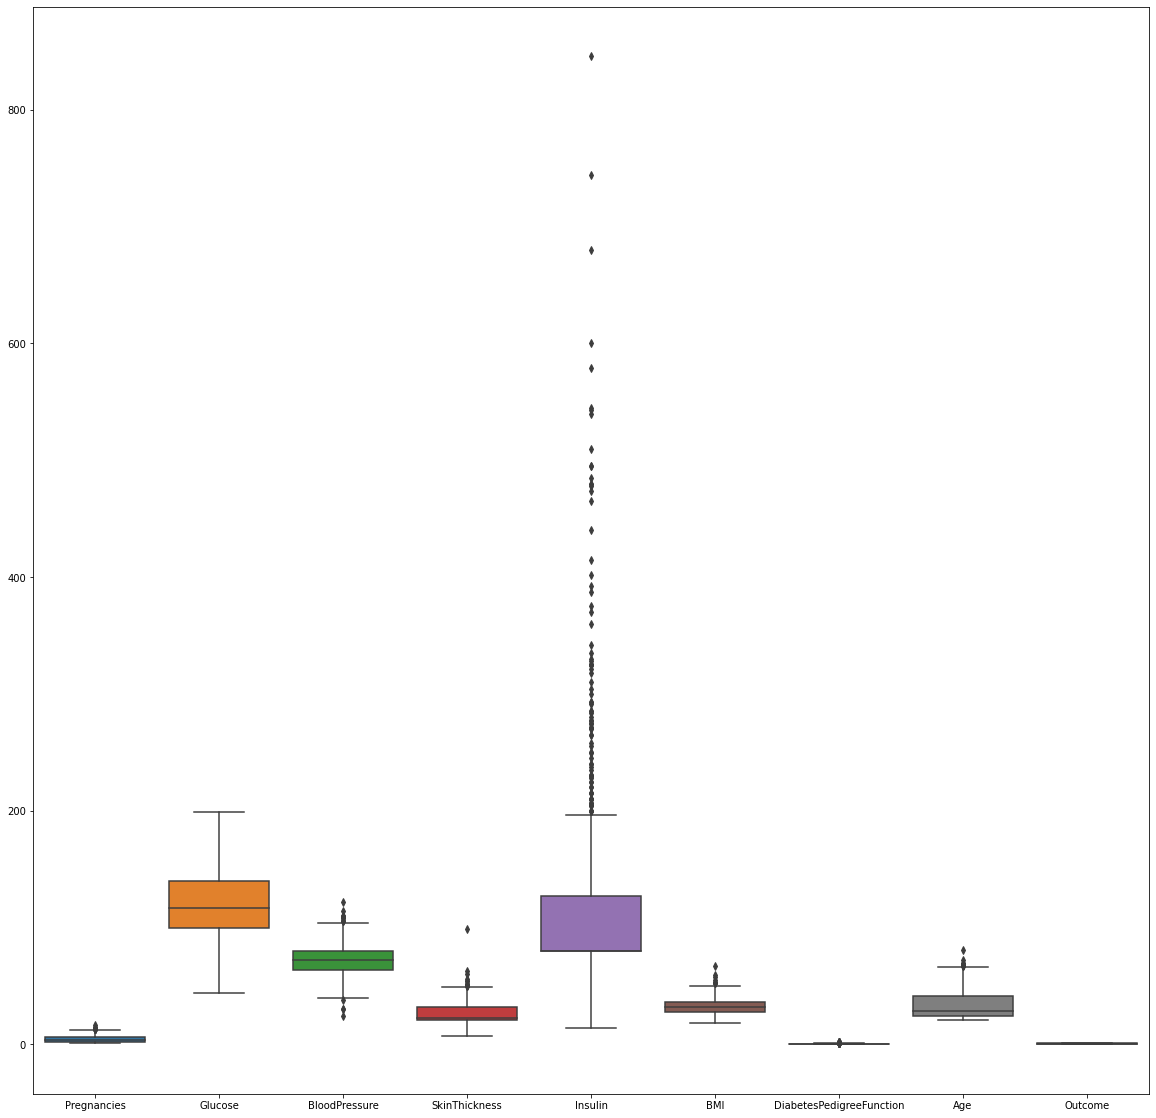

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df, ax = ax)

In [42]:
q = df['Insulin'].quantile(.7)

In [43]:
q

106.0

In [44]:
df_new = df[df['Insulin'] < q ]

In [45]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
762,9.0,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

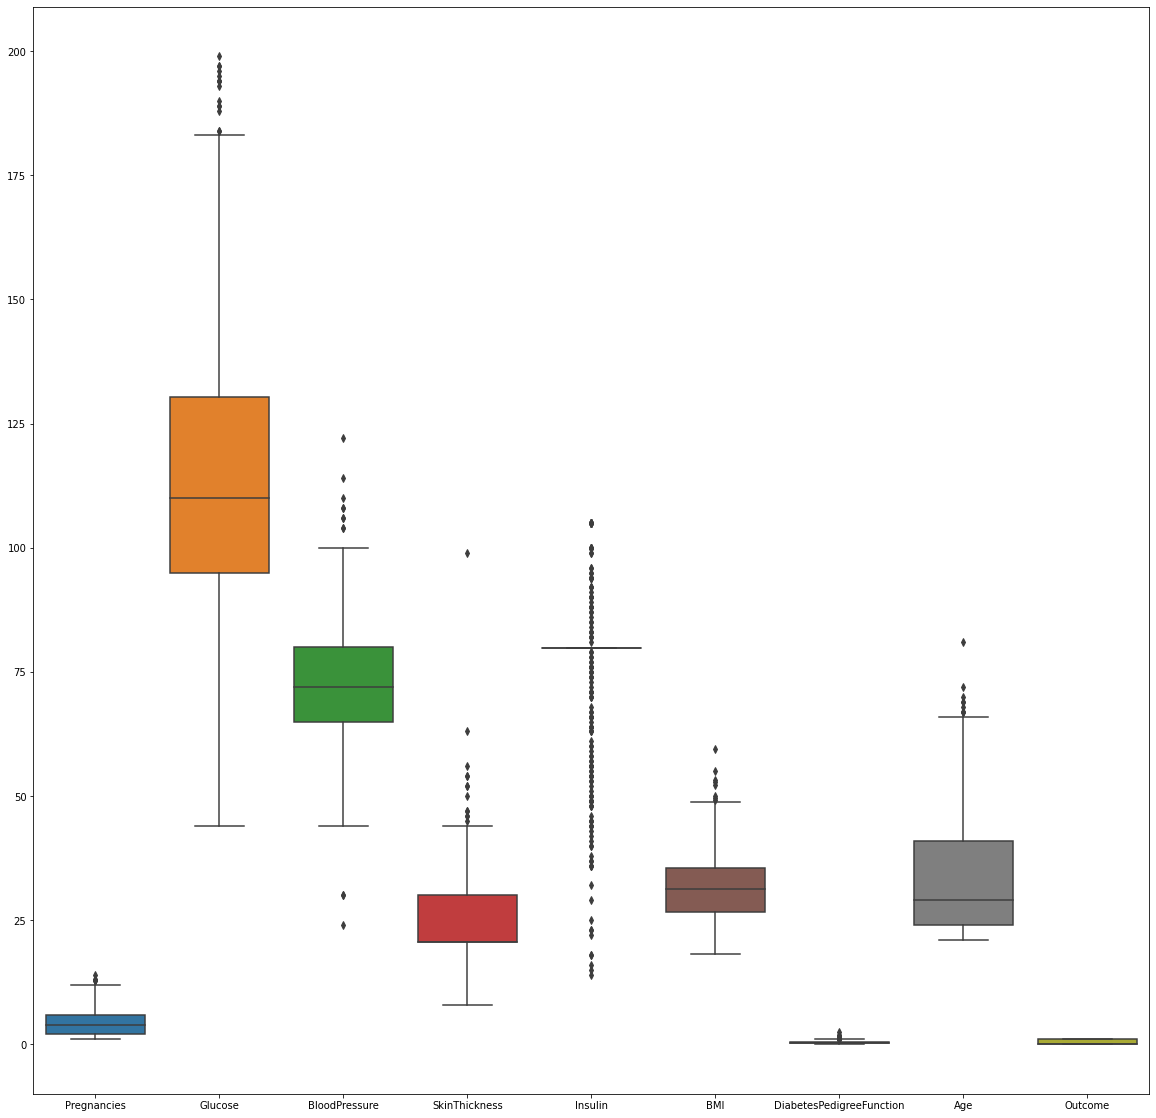

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df_new, ax = ax)

In [48]:
q = df['Pregnancies'].quantile(.9)
q


9.0

In [58]:
df_new = df.copy()
for i in [['Pregnancies',.98] ,['BMI',.99],  ['SkinThickness',.99], ['Insulin',.95], ['DiabetesPedigreeFunction', .90], ['Age',.99]]:
    # print(i[0],i[1] )
    q = df_new[i[0]].quantile(i[1])
    df_new = df_new[df_new[i[0]] < q ]



<AxesSubplot:>

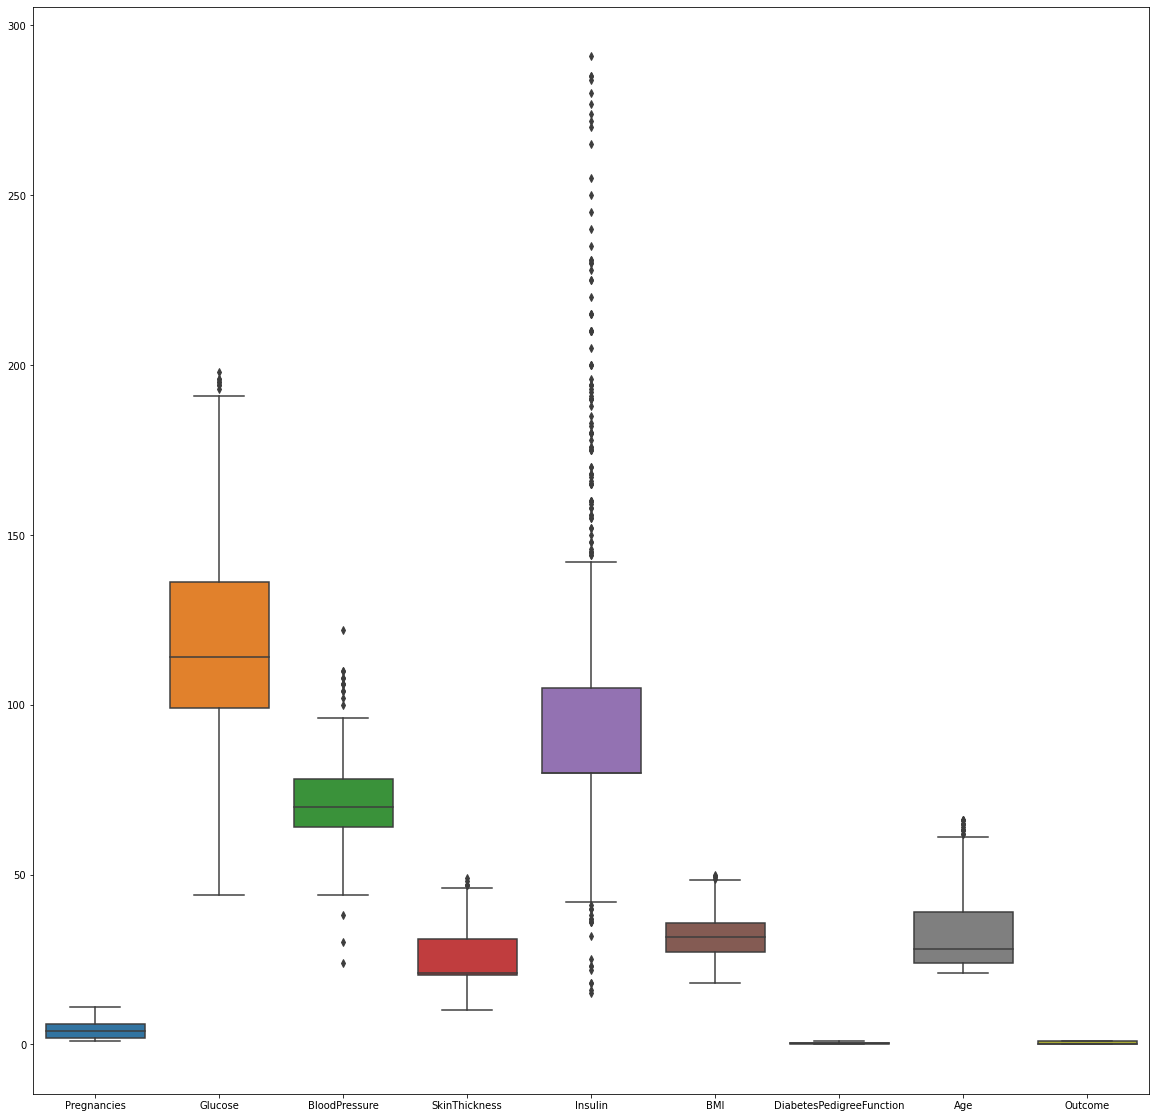

In [59]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df_new, ax = ax)

In [60]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [81]:
pf = ProfileReport(df_new)

In [82]:
scalar = StandardScaler()
pf = ProfileReport(pd.DataFrame(scalar.fit_transform(df_new)))

In [66]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))

<AxesSubplot:>

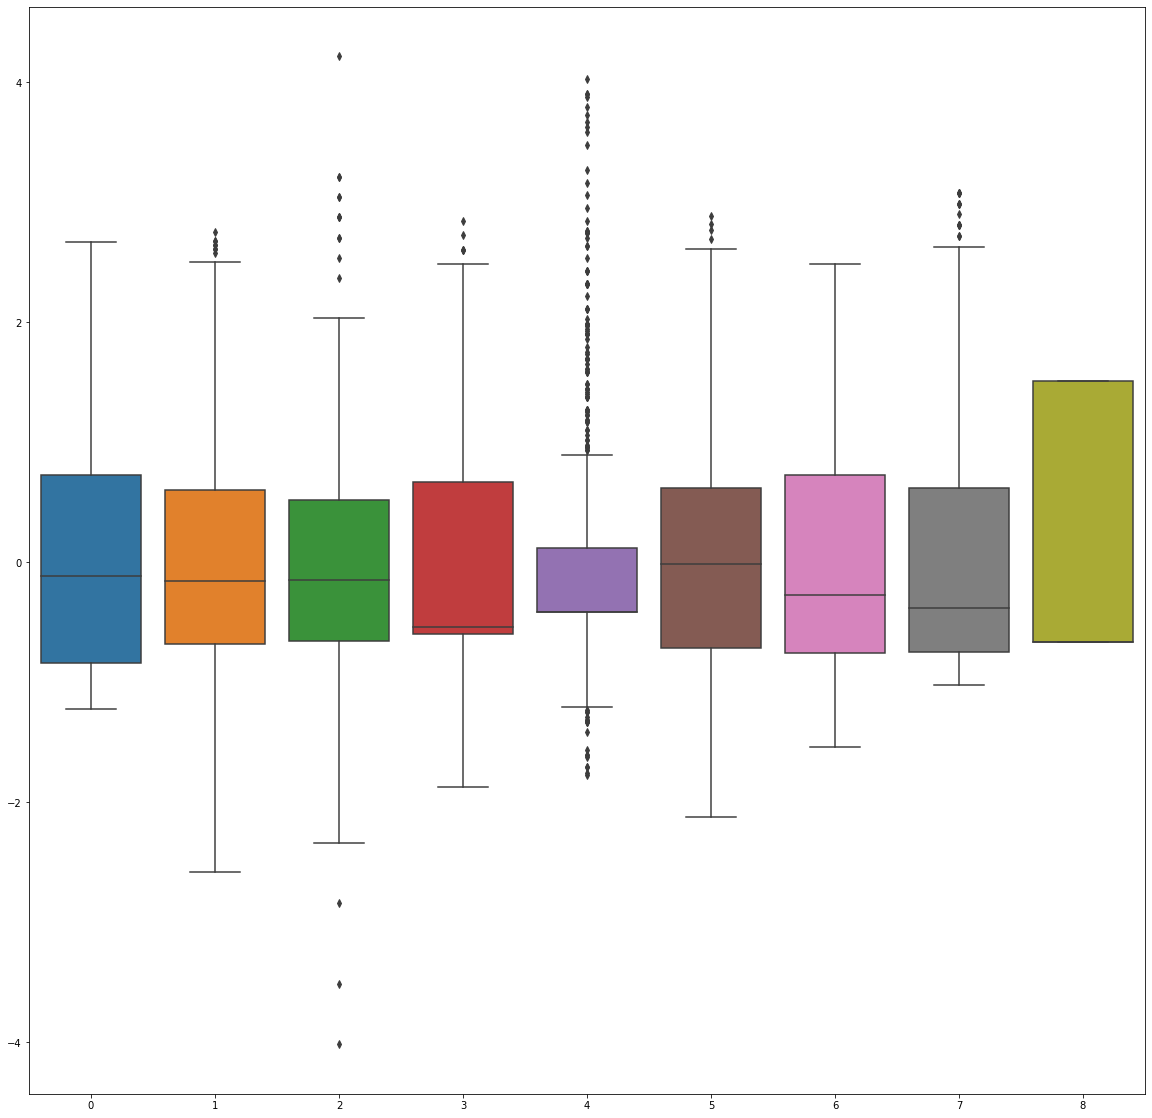

In [67]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df_new_scalar, ax = ax)

In [89]:
y = df_new['Outcome']

In [73]:
X = df_new.drop(columns = ['Outcome'])

In [112]:
X_scaled = scalar.fit_transform(X)

In [113]:
X_scaled

array([[ 0.72495102,  1.01927833,  0.01782863, ...,  0.30057242,
         1.24934841,  1.62396061],
       [-1.22395298, -1.16056113, -0.48639783, ..., -0.80161781,
        -0.15340311, -0.10671614],
       [ 1.50451262,  2.23030025, -0.65447331, ..., -1.32122177,
         1.47805789, -0.01562789],
       ...,
       [ 0.33517022,  0.08506142,  0.01782863, ..., -0.86460011,
        -0.69214101, -0.19780439],
       [-1.22395298,  0.25806455, -0.99062428, ..., -0.25052269,
        -0.16356798,  1.35069586],
       [-1.22395298, -0.88375612, -0.15024686, ..., -0.20328597,
        -0.3363707 , -0.83542213]])

In [114]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns = ["FEATURE","VIF_SCORE"])

In [115]:
vif_score(X)

,FEATURE,VIF_SCORE
0,Pregnancies,1.438616
1,Glucose,1.288772
2,BloodPressure,1.251757
3,SkinThickness,1.459453
4,Insulin,1.269047
5,BMI,1.503968
6,DiabetesPedigreeFunction,1.029812
7,Age,1.585435


In [116]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, test_size=.20, random_state=144)

In [117]:
x_test

array([[-0.05461058, -0.12254234,  0.01782863, -0.59718273, -0.41076012,
        -0.43946959, -0.02634228,  1.25960761],
       [-0.1150063 ,  0.15426267,  0.01782863, -0.59718273, -0.41076012,
         0.72570294, -0.62606938,  1.80613711],
       [-1.22395298, -0.67615236,  0.01782863,  0.54811632, -1.70878465,
         1.08785115,  0.15662531, -1.01759863],
       [-0.05461058,  0.46566831,  1.19435702,  0.66913856, -0.41076012,
        -0.58117976,  0.19220234,  2.80810785],
       [ 0.33517022, -0.15714296,  0.18590411, -0.59718273, -0.41076012,
        -1.06929258,  1.84399307,  2.26157835],
       [ 1.50451262, -1.54116801, -0.15024686,  1.75833876, -1.05766654,
         0.56824719,  1.64577818,  0.62198986],
       [-1.22395298,  0.70787269, -2.16715267, -0.78312836, -0.34353699,
        -0.47096074,  1.3865741 , -0.92651038],
       [-1.22395298, -1.36816488,  0.26994185,  0.54811632, -0.41076012,
         0.04864322,  0.07530638, -0.92651038],
       [-0.1150063 , -1.19516175

In [118]:
logr = LogisticRegression(verbose=1)
logr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [124]:
x_test[0]

array([-0.05461058, -0.12254234,  0.01782863, -0.59718273, -0.41076012,
       -0.43946959, -0.02634228,  1.25960761])

In [133]:

logr.predict_proba([x_test[0]])


array([[0.79793906, 0.20206094]])

In [131]:
logr.predict([x_test[2]])

array([0], dtype=int64)

In [121]:
logr.predict_log_proba([x_test[0]])

array([[-0.22572305, -1.59918596]])

In [132]:
y_test.iloc[2]

0